In [8]:
import os,sys,string, time
from math import *
from array import array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from root_pandas import read_root
from platform import python_version
import scipy
from scipy import stats
import math
from matplotlib.patches import Rectangle
import joblib

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Var_list

print ('Success')


Success


## Reading .csv list

In [9]:
def Pandafy(path):
    cols = ['Mass','Value']
    df = pd.read_csv(path,names=cols)
    firstLine = pd.DataFrame([[df['Mass'][0],1.]],columns=cols)
    lastLine = pd.DataFrame([[df['Mass'][-1:].values[0],1.]],columns=cols)
    df = pd.concat([firstLine,df])
    df = pd.concat([df,lastLine])
    return df

## Reading in files

In [10]:
samples = ["PIENU","PS191","KEK","E949"]
print("Plotting these limits: " + str(samples))
plot_dict = {}
for sample in samples:
    plot_dict[sample] = Pandafy(Constants.limit_locs[sample])

uboone_top_20 = Pandafy('limit_files/Flat_sys_havled_expected_mu_top_20_logit_New_gen.csv')

uboone_70percent_sys = Pandafy('limit_files/Flat_sys_havled_expected_mu_top_20_logit_New_gen_70percent_sys.csv')

uboone_pi0_approx = Pandafy('limit_files/Flat_sys_havled_expected_mu_all_vars_logit_New_run1.csv')

Theorist_Pawels = Pandafy('limit_files/Reinterp_Pawels_result.csv')

point = [150,4.26974152748967e-07]

Plotting these limits: ['PIENU', 'PS191', 'KEK', 'E949']


## Plotting limits

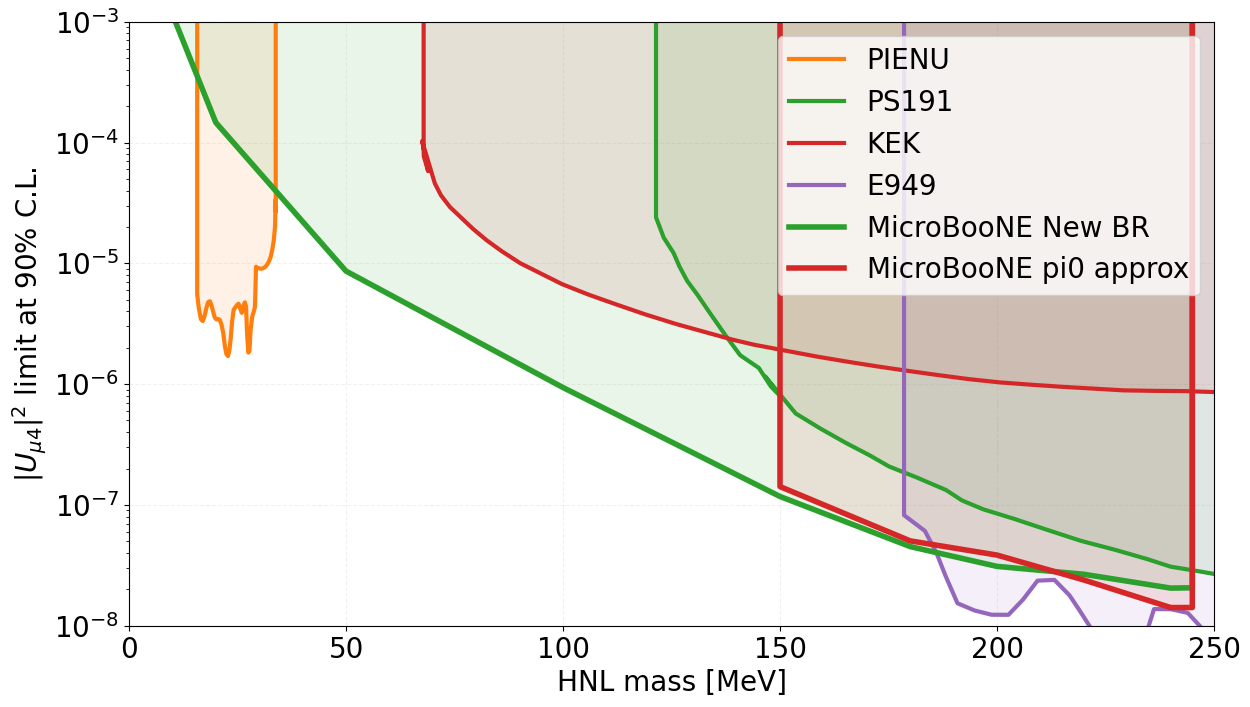

In [13]:
style_ps = '-'
style_ds = '-'
transp = 0.05

plt.figure(figsize=(14,8),facecolor='white',dpi=100)

#Could loop over a dict (saved in constants) of other relevant limits
for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)

# plt.plot(uboone_70percent_sys['Mass'],uboone_70percent_sys['Value'],label="MicroBooNE plus extra systematic",color="C13",lw=4)
# plt.fill_between(uboone_70percent_sys['Mass'],uboone_70percent_sys['Value'],1,color="C13",alpha=0.1)

plt.plot(uboone_top_20['Mass'],uboone_top_20['Value'],label="MicroBooNE New BR",color="C12",lw=4)
plt.fill_between(uboone_top_20['Mass'],uboone_top_20['Value'],1,color="C12",alpha=0.1)

plt.plot(uboone_pi0_approx['Mass'],uboone_pi0_approx['Value'],label="MicroBooNE pi0 approx",color="C13",lw=4)
plt.fill_between(uboone_pi0_approx['Mass'],uboone_pi0_approx['Value'],1,color="C13",alpha=0.1)

# plt.plot(150, 4.26974152748967e-07, marker="o",markersize=10,markeredgecolor="C13",markerfacecolor="C13", label="pi0 run1")

plt.xlabel('HNL mass [MeV]',fontsize=20)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=20)
plt.legend()
plt.ylim(1e-8,1e-3)
#plt.xlim(0,0.45)$
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20})
# plt.savefig('plots/Limits/limitsComparison_mu_prelim_new_BR_plus_sys.pdf',bbox_inches='tight', pad_inches=0.3)
plt.show()


In [5]:
#PLOT ratio of stats only to systematic